# Modelo inception_v3 
Este proyecto es parte del curso de Platzi  , usameremos el modelo inception que es un RNN 

In [1]:
import torch 
import numpy as np 
#importamos libreria para tener red neuronal , modelos ,data set y transformaciones
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms 
#Nos permite manipular imagnes 
from PIL import Image
# trearla de internet 
import urllib.request as request 
#Graficar 
from matplotlib import pyplot as plt

In [2]:
# -- traemos el modelo 
def modelo():
    modelo = models.inception_v3(pretrained=True)
    return modelo
inception = modelo()

C:\Users\jandr\anaconda3\envs\Data-science\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jandr\anaconda3\envs\Data-science\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Usaremos un dataset
Vamos a usar un dataset que contiene imagenes preestablecidas ,CIFAR-10, de dicho set sus imagenes estan en 32x32x3 (RGB) de tamaño para agilizar su estudio , clases mutuamente excluyentes , las clases que contiene son 10 : plane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. con 6000 imagines por clase 

In [11]:
def get_dataset():
    # -- definimos donde se van a guardar --
    data_path = 'data/'
    # -- traemos CIFAR10 -- 
    dataset_ = datasets.CIFAR10(data_path , train=True , download=True)
    validation_sets =  datasets.CIFAR10(data_path , train=False , download=True)
    return dataset_ ,validation_sets , data_path
dataset , validation_set, data_path = get_dataset()
    

Files already downloaded and verified
Files already downloaded and verified


In [4]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/
    Split: Train

In [5]:
# -- vamos crear manualmente las clases -- 
clases = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
# anteriormente ya hemos comprobado que la longitud del dataset es 50000 imagenes

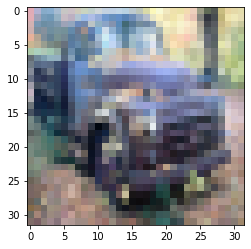

In [6]:
# -- hacemos una revision del dataset para ver si ha cargado bien -- 
img , label = dataset[11111]
img, label , clases[label]
# -- hacemos un plot -- 
plt.imshow(img)

In [9]:
# -- debemos convertir los datos a tensor para torch las pueda manejar  --
def to_tensor(img):
    tensor_transform = transforms.ToTensor()
    img_tensor  = tensor_transform(img)
    return tensor_transform, img_tensor
tensor_transform, img_tensor = to_tensor(img)
img_tensor.shape
img_tensor

tensor([[[0.8824, 0.7020, 0.5294,  ..., 0.9098, 0.8980, 0.8941],
         [0.8863, 0.6314, 0.4667,  ..., 0.9333, 0.9333, 0.9020],
         [0.8235, 0.4745, 0.4235,  ..., 0.8627, 0.8588, 0.7922],
         ...,
         [0.5176, 0.5294, 0.4431,  ..., 0.5686, 0.6000, 0.5725],
         [0.4235, 0.6471, 0.4863,  ..., 0.5882, 0.6118, 0.6902],
         [0.5020, 0.4784, 0.5608,  ..., 0.5529, 0.5255, 0.6275]],

        [[0.6706, 0.6980, 0.6706,  ..., 0.8353, 0.8510, 0.8667],
         [0.6784, 0.6392, 0.6118,  ..., 0.8902, 0.9098, 0.8667],
         [0.6980, 0.5922, 0.5569,  ..., 0.8078, 0.8431, 0.7882],
         ...,
         [0.4157, 0.4353, 0.4157,  ..., 0.5059, 0.5843, 0.5137],
         [0.4196, 0.5216, 0.4392,  ..., 0.5216, 0.5686, 0.6000],
         [0.4275, 0.3765, 0.5020,  ..., 0.4627, 0.4824, 0.5333]],

        [[0.7137, 0.8235, 0.7882,  ..., 0.6314, 0.6588, 0.6784],
         [0.7098, 0.7255, 0.7255,  ..., 0.6745, 0.7216, 0.7020],
         [0.6980, 0.6941, 0.6392,  ..., 0.5961, 0.6824, 0.

In [12]:
# -- ahora añaodimos tensor_transform a CIFAR10 para que queden como los datos -- 
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=tensor_transform)

Files already downloaded and verified


In [13]:
#volevemos a ver que obtenemos del dataset e imprimimos un tensor para ver so esta correcto
img , label = dataset[11111]
img


tensor([[[0.8824, 0.7020, 0.5294,  ..., 0.9098, 0.8980, 0.8941],
         [0.8863, 0.6314, 0.4667,  ..., 0.9333, 0.9333, 0.9020],
         [0.8235, 0.4745, 0.4235,  ..., 0.8627, 0.8588, 0.7922],
         ...,
         [0.5176, 0.5294, 0.4431,  ..., 0.5686, 0.6000, 0.5725],
         [0.4235, 0.6471, 0.4863,  ..., 0.5882, 0.6118, 0.6902],
         [0.5020, 0.4784, 0.5608,  ..., 0.5529, 0.5255, 0.6275]],

        [[0.6706, 0.6980, 0.6706,  ..., 0.8353, 0.8510, 0.8667],
         [0.6784, 0.6392, 0.6118,  ..., 0.8902, 0.9098, 0.8667],
         [0.6980, 0.5922, 0.5569,  ..., 0.8078, 0.8431, 0.7882],
         ...,
         [0.4157, 0.4353, 0.4157,  ..., 0.5059, 0.5843, 0.5137],
         [0.4196, 0.5216, 0.4392,  ..., 0.5216, 0.5686, 0.6000],
         [0.4275, 0.3765, 0.5020,  ..., 0.4627, 0.4824, 0.5333]],

        [[0.7137, 0.8235, 0.7882,  ..., 0.6314, 0.6588, 0.6784],
         [0.7098, 0.7255, 0.7255,  ..., 0.6745, 0.7216, 0.7020],
         [0.6980, 0.6941, 0.6392,  ..., 0.5961, 0.6824, 0.

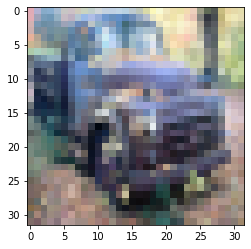

In [15]:
#obtenemos los minimos y maximos de la funcion
img.min() , img.max()
#mostramos la imagen con una permutacion
plt.imshow(img.permute(1,2,0))

In [17]:
#hacemos un stack con todas las imagenes y como tiene 3D las creamos por cada una del dataset
imgs = torch.stack([img_tensor for img_tensor  , _ in dataset] , dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
# -- un buen uso seria sacar la media, la desv standar para añadirlos a la funcion transform en Normalize -- 
imgs.view(3,-1).mean(dim=1) , imgs.view(3,-1).std(dim=1)


(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [20]:
def transformacion():
    #con datos obtenidos en mean y std los colocamos en transform junto a la funcion Normalize y el metodo compose
    transform = transforms.Compose(
                  [transforms.ToTensor(),
                   transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                  ])
    return transform
transform = transformacion()

In [21]:
#volvemos a importar todo el data set pero esta ves le pasamos la funcion transform ya creada 
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bird'

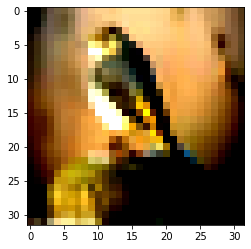

In [29]:
#se trae la imagen de los dataset y probamos a impromir de nuevo para verificar que todo esta en orden 
numeros = 11420 
img_transformed,label = dataset[numeros]
plt.imshow(img_transformed.permute(1, 2, 0))
clases[label]